K = 10
m = 1
u0 = 1e-06
gの代入確認
g0 = 1e-05
g1 = -1.25e-06
gt = 1.4644660940672628e-06
a_0 = -7.500000000000001e-06
Discriminant = 5.000000000000001e-11
F =
[[ 0.  1.]
 [-1. -6.]]
-------------------------

 i = -10
A_ -10 = -45239074.00000001
v_ -10 = -7172355.487078572
-------------------------

 i = -9
A_ -9 = 7761797.99999975
v_ -9 = 1230581.6532605127
-------------------------

 i = -8
A_ -8 = -1331713.9999984994
v_ -8 = -211134.4324845044
-------------------------

 i = -7
A_ -7 = 228485.9999912469
v_ -7 = 36224.94164651377
-------------------------

 i = -6
A_ -6 = -39201.99994898222
v_ -6 = -6215.217394572112
-------------------------

 i = -5
A_ -5 = 6725.999702646444
v_ -5 = 1056.9741279086634
-------------------------

 i = -4
A_ -4 = -1153.9982668964462
v_ -4 = -184.66895481030988
-------------------------

 i = -3
A_ -3 = 197.98989873223337
v_ -3 = 31.25675744377499
-------------------------

 i = -2
A_ -2 = -33.94112549695429
v_ -2 = -5.31289617051318
----------------------

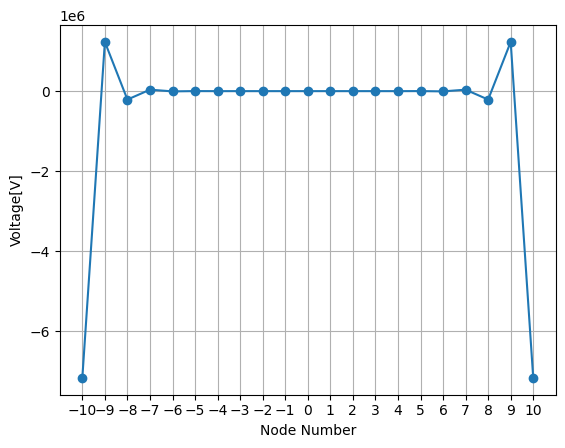

In [ ]:
# m=1の回路について解析式を数値計算する
# Numpyをインポートする
import numpy as np
# NumpyのLinearAlgebraをインポートする（Scipy使うなら不要か）
import numpy.linalg as LA
# Scipyをインポートする
import scipy as sp
# matplotlib
import matplotlib.pyplot as plt
import math

# 回路サイズ　全ノード数n=2K+1[個]
K = 10
print('K =', K)

# mの値、最大で何個隣のノードまで接続するか
m = 1
print('m =', m)

# 電流源からの入力電流u[A]
u0 = 10**(-6)
print('u0 =', u0)

# plot用のリスト作成
i_values = []
v_values = []

# コンダクタンスg[/ohm]または[S(ジーメンス)]導電率
g0 = 10**(-5)
g1 = -(10**(-5))/8
gt = (g0 * (1 - (1/math.sqrt(2)))) / 2
a_0 = -(g0 + 2 * g1)
print('gの代入確認')
print('g0 =', g0)
print('g1 =', g1)
print('gt =', gt)
print('a_0 =', a_0)

# 判別式D
if m == 1:
  D = g0 * (g0 + 4 * g1)
  print('Discriminant =', D)

# F行列のサイズ
size = 2 * m

# ゼロ行列を用意する
matrixF = np.zeros((size, size))

# 行列要素を設定する（1行1列が[0, 0]にあたる）
for number in range(size-1):
  matrixF[number, number +1] = 1
## 2m行目の要素についてa0の項(m+1列目)を中心として2列目および2m列目まで値を更新する
#for middle in range(m-1):
#  matrixF[size-1, m - (middle+1)] = -(g[middle+1]/g[m])
#  matrixF[size-1, m + (middle+1)] = -(g[middle+1]/g[m])
#matrixF[size-1, m] = a_0 / g[m]
matrixF[size-1, 0] = -1
if m == 1:
  matrixF[1, 1] = (g0 + 2*g1)/g1

# F行列を表示する
print('F =')
print(matrixF)
print('-'*25)

# 固有値を計算する
lamp = (g0 + 2*g1 + math.sqrt(g0*(g0 + 4*g1))) / (2*g1)
lamn = (g0 + 2*g1 - math.sqrt(g0*(g0 + 4*g1))) / (2*g1)

# A_nを定義
def A_n(n):
  return -pow(lamp, n) + pow(lamn, n)

# viを計算
if m ==1:
  if D == 0:
    for i in range(-K, K+1):
      vi = u0 * (-i + K + (g1/gt)) / (2 * g1)
      print('v_', i, '=', vi)
  else:
    for i in range(-K, K+1):
      print('\n', 'i =', i)
      print('A_', i, '=', A_n(abs(i)))
      vi = (u0 / (g1 * A_n(1))) * (((A_n(abs(i)+1) * A_n(K) - A_n(abs(i)) * A_n(K+1)) * (g1+gt) + (A_n(abs(i)) * A_n(K) - A_n(abs(i)+1) * A_n(K-1)) * g1) / (((A_n(K+1) - A_n(K-1)) * (g1+gt)) - ((A_n(K) - A_n(K-2)) * g1)))
      print('v_', i, '=', vi)
      i_values.append(i)
      v_values.append(vi)
      print('-'*25)

# 図示
# プロット
plt.plot(i_values, v_values, marker='o', linestyle='-')
# 横軸のメモリを整数に設定
plt.xticks(range(-K, K + 1, 1))
# グラフのタイトルとラベルを設定
# plt.title('')
plt.xlabel('Node Number')
plt.ylabel('Voltage[V]')

# グリッドを表示
plt.grid(True)

# グラフを表示
plt.show()

# F行列の固有値を計算する
# print('Scipyより')
# w, X = sp.linalg.eig(matrixF)
# print('Scipy固有値\n', w)
# print('Scipy固有ベクトル\n', X)